# Importing Data and modules

In [90]:
#importing modules

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, confusion_matrix, classification_report,roc_auc_score
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#importing data

sheet_name = 'Data_Science_Internship'
id='1rK1CLqpsd6JfSBLk9nRE-f0NzDc9lEXgxZ-cKjxIN_s'
url="https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(id, sheet_name)

In [10]:
df=pd.read_csv(url)
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          46608 non-null  object
 8   source_city     46608 non-null  object
 9   source_country  46608 non-null  object
 10  utm_source      46608 non-null  object
 11  utm_medium      46608 non-null  object
 12  des_city        46608 non-null  object
 13  des_country     46608 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


In [12]:
df.shape

(46608, 16)

In [13]:
df.columns

Index(['Unnamed: 0', 'Agent_id', 'status', 'lost_reason', 'budget', 'lease',
       'movein', 'source', 'source_city', 'source_country', 'utm_source',
       'utm_medium', 'des_city', 'des_country', 'room_type', 'lead_id'],
      dtype='object')

In [14]:
#dropping this unnamed extra column
df.drop(columns = 'Unnamed: 0', inplace = True)

In [15]:
# checking for unique values
v=[]
for a in df.columns:
  x=df[a].nunique()
  v.append(x)
d={'column':df.columns,'unique_values': v}
unique_values = pd.DataFrame.from_dict(d)
unique_values

,column,unique_values
0,Agent_id,120
1,status,6
2,lost_reason,30
3,budget,1857
4,lease,311
5,movein,477
6,source,683
7,source_city,4336
8,source_country,186
9,utm_source,35


# **Data Cleaning**

In [16]:
#droping the duplicate entries
df.drop_duplicates(subset='lead_id', keep="first",inplace=True)

In [19]:
df.status.unique()


array(['LOST', 'WON', 'OPPORTUNITY', 'CONTACTED', 'PROCESSING',
       'IMPORTANT'], dtype=object)

In [20]:
#creating a dataframe where status value is either won or lost
new_df= df[df['status'].isin(['LOST','WON'])]
new_df.shape

(30382, 15)

In [21]:
#changing status values for won and lost to 1 and 0
new_df['status']= new_df['status'].replace(['WON','LOST'],[1,0])

<ipython-input-21-001e48d28d63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['status']= new_df['status'].replace(['WON','LOST'],[1,0])


In [22]:
new_df.head()

,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,0,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,0,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,0,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,0,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [23]:
#replacing all the invalid id values with NaN mentioned in the problem statement
new_df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan,inplace=True)

<ipython-input-23-e2ee65b79ae2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan,inplace=True)


In [24]:
#checking for null values in dataset
new_df.isna().sum()

Agent_id              0
status                0
lost_reason        2034
budget             2358
lease              1492
movein             9005
source             3923
source_city        5494
source_country     5360
utm_source           50
utm_medium         2099
des_city           1687
des_country        1687
room_type         15291
lead_id               0
dtype: int64

In [25]:
#checking null values percentage
round(100*(new_df.isnull().sum()/len(new_df.index)), 2)

Agent_id           0.00
status             0.00
lost_reason        6.69
budget             7.76
lease              4.91
movein            29.64
source            12.91
source_city       18.08
source_country    17.64
utm_source         0.16
utm_medium         6.91
des_city           5.55
des_country        5.55
room_type         50.33
lead_id            0.00
dtype: float64

1. Since we have high percentage of missing data for room type column and move in column we will drop these columns from the dataset to aid in better performing model.

2. We will also drop lead_id as it is a unique id to all for the leads and lost reason column from our dataset as it will not serve any purpose.

In [26]:
#dropping all the 4 coluns from dataset
new_df.drop(columns = ['lost_reason','movein','room_type','lead_id'], inplace = True)

<ipython-input-26-ed9bcb5b1115>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns = ['lost_reason','movein','room_type','lead_id'], inplace = True)


In [27]:
new_df.shape

(30382, 11)

## **1.Budget**

In [28]:
new_df.columns

Index(['Agent_id', 'status', 'budget', 'lease', 'source', 'source_city',
       'source_country', 'utm_source', 'utm_medium', 'des_city',
       'des_country'],
      dtype='object')

In [29]:
budget= pd.DataFrame(new_df['budget'].value_counts())
budget

,budget
£60 - £120 Per week,6497
£121 - £180 Per Week,5821
0-0,3799
£181 - £240 Per Week,1433
100,995
...,...
600-750pm,1
1400-1500,1
0-600-700 per month,1
0-140/week for double occupancy,1


In [30]:
#checking unique values and value counts of budget column
print('unique values in budget column are:',new_df['budget'].nunique())

#checking for null values in budget column
print('null values in budget column are:',new_df['budget'].isna().sum())

#since most of the values has very low frequency we are only considering values with frequency more than 500 to reduce no of categorical values and avoid high dimensionality
print('No of unique categories having frequency greater than 100 :',budget[budget['budget']>500].shape[0])

unique values in budget column are: 1397
null values in budget column are: 2358
No of unique categories having frequency greater than 100 : 6


In [31]:

#creating a list of values having frequency less than 500
low_frequency_values_b=list(budget[budget['budget']<500].index)

#creating a list of top 10 most frequent values
top_10_frequent_values_b= list(budget.head(10).index)

#replacing all lower frequency values with random top 10 most frequent values: 
#(here we are randomly replacing lower frequency values with top 10 values because we don't want to overpopulate dataset with 1 value as it may lead to creating an imbalanced dataset)

from random import sample
new_df['budget'] = new_df['budget'].apply(lambda x: sample(top_10_frequent_values_b,1)[0] if x in low_frequency_values_b else x)



<ipython-input-31-d14c37a73213>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['budget'] = new_df['budget'].apply(lambda x: sample(top_10_frequent_values_b,1)[0] if x in low_frequency_values_b else x)


In [32]:
#checking unique and null values after treating budget column
print('unique values in budget column:',new_df['budget'].nunique())
print('null values in budget column:',new_df['budget'].isna().sum())

unique values in budget column: 10
null values in budget column: 2358


We are now left with 10 unique values in budget column

## **2.Lease**

In [33]:
lease= pd.DataFrame(new_df['lease'].value_counts())
lease

,lease
Full Year Course Stay 40 - 44 weeks,7253
0,5018
Complete Education Year Stay 50 - 52 weeks,4239
51,2526
Semester Stay 20 - 24 weeks,1835
...,...
38 Weeks,1
N/44,1
44-51 weeeks,1
51 weeks ( I don’t mind travelling over an hour),1


In [34]:
#checking unique values and value counts of lease column
print('unique values in lease column are:',new_df['lease'].nunique())

#checking for null values in lease column
print('null values in lease column are:',new_df['lease'].isna().sum())


new_df['lease'].value_counts()
lease= pd.DataFrame(new_df['lease'].value_counts())

#since most of the values has very low frequency we are only considering values with more 200 frequency to reduce no of categorical values and avoid high dimensionality
print('No of unique categories having frequency greater than 100 :',lease[lease['lease']>200].shape[0])


unique values in lease column are: 252
null values in lease column are: 1492
No of unique categories having frequency greater than 100 : 14


In [35]:

#creating a list of values having frequency less than 200
low_frequency_values_l=list(lease[lease['lease']<200].index)


#creating a list of top 10 most frequent values
top_10_frequent_values_l= list(lease.head(10).index)

#replacing all lower frequency values with random top 10 most frequent values: 
#(here we are randomly replacing lower frequency values with top 10 values because we don't want to overpopulate dataset with 1 value as it may lead to creating an imbalanced dataset)

from random import sample
new_df['lease'] = new_df['lease'].apply(lambda x: sample(top_10_frequent_values_l,1)[0] if x in low_frequency_values_l else x)

#replacing null values with random top 10 most frequent values: 
new_df['lease']= new_df['lease'].fillna(sample(top_10_frequent_values_l,1)[0])



<ipython-input-35-d95d3db83194>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['lease'] = new_df['lease'].apply(lambda x: sample(top_10_frequent_values_l,1)[0] if x in low_frequency_values_l else x)
<ipython-input-35-d95d3db83194>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['lease']= new_df['lease'].fillna(sample(top_10_frequent_values_l,1)[0])


In [36]:
#checking unique and null values after treating lease column
print('unique values in lease column:',new_df['lease'].nunique())
print('null values in lease column:',new_df['lease'].isna().sum())


unique values in lease column: 14
null values in lease column: 0


## **3. Agent**

In [37]:
agent= pd.DataFrame(new_df['Agent_id'].value_counts())
agent


,Agent_id
2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,5309
96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489,959
44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450,834
fb3e2c0015ad5bcd60d7619ca575a56c15c5d2cd3f01f18e68c4dfaeee585db5,730
eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b,692
...,...
04222ea3e14cb1209b9726defe3efce5196b7afa0a959854a30401be41f4026d,1
c4e2e9a17e38d281b86a468fabd6b9eed6b88a0f229eef8aeb3aaa5b640b0cba,1
c904d4c3485db6569c9deb41da845d82056e8843eafba8bc8a90aaa06df96963,1
59e19706d51d39f66711c2653cd7eb1291c94d9b55eb14bda74ce4dc636d015a,1


In [38]:
#checking unique values and value counts of agent column
print('unique values in agent column are:',new_df['Agent_id'].nunique())

#checking for null values in agent column
print('null values in agent column are:',new_df['Agent_id'].isna().sum())


#since there are many unique categories we are only considering values with frequency more 600  to avoid high dimensionality
print('No of unique categories having frequency greater than 600 :',agent[agent['Agent_id']>600].shape[0])

unique values in agent column are: 117
null values in agent column are: 0
No of unique categories having frequency greater than 600 : 7


In [39]:
#creating a list of values having frequency less than 600
low_frequency_values_a=list(agent[agent['Agent_id']<600].index)

#creating a list of top 10 most frequent values
top_10_frequent_values= list(agent.head(10).index)

#replacing all lower frequency values with random top 10 most frequent values: 
#(here we are randomly replacing lower frequency values with top 10 values because we don't want to overpopulate dataset with 1 value as it may lead to creating an imbalanced dataset)

from random import sample
new_df['Agent_id'] = new_df['Agent_id'].apply(lambda x: sample(top_10_frequent_values,1)[0] if x in low_frequency_values_a else x)



<ipython-input-39-17f5e85e0661>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Agent_id'] = new_df['Agent_id'].apply(lambda x: sample(top_10_frequent_values,1)[0] if x in low_frequency_values_a else x)


In [40]:
#checking unique and null values after treating Agent id column
print('unique values in agent id column:',new_df['Agent_id'].nunique())
print('null values in agent id column:',new_df['Agent_id'].isna().sum())


unique values in agent id column: 10
null values in agent id column: 0


## **4. Source**

In [41]:
new_df.columns

Index(['Agent_id', 'status', 'budget', 'lease', 'source', 'source_city',
       'source_country', 'utm_source', 'utm_medium', 'des_city',
       'des_country'],
      dtype='object')

In [42]:
source= pd.DataFrame(new_df['source'].value_counts())
source


,source
7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2b7c51be879f0c37ca8,12622
7bcfca0e9d73371699b0adbf1c691e02108fa64f02f4dbe24a0217f139a9b916,2526
ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9eaa29e3f169d2ca43b2b,2415
d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e229dae06e64c5c41b64,1433
9ba9134a91cfc6b52ac8d480e9ad37896ca4ac216e2d795fdb7d75a63d6c60af,1409
...,...
7017f01ae3460d4316d2037c64ed83c7f98526222d9a53c3d92bee9ee69b1000,1
e0a1014923e24677afd063f5d36538870f3bef2ec35c307918154b48e860fc40,1
033a4a60dfe036110908aa92c4aa3c7ee43456a473f9a431e247ba8682178f47,1
9d202fc6648a394eaaf1f8fec0cc84799178771fa60b8293f6e4dc423ac4f596,1


In [43]:
#checking unique values and value counts of source column
print('unique values in agent column are:',new_df['source'].nunique())

#checking for null values in source column
print('null values in agent column are:',new_df['source'].isna().sum())


#since there are many unique categories we are only considering values with frequency more 200  to avoid high dimensionality
print('No of unique categories having frequency greater than 200 :',source[source['source']>200].shape[0])

unique values in agent column are: 527
null values in agent column are: 3923
No of unique categories having frequency greater than 200 : 11


In [44]:
#creating a list of values having frequency less than 200
low_frequency_values_s=list(source[source['source']<200].index)

#creating a list of top 5 most frequent values
top_5_frequent_values_s= list(source.head(5).index)

#replacing all lower frequency values with random top 5 most frequent values: 
#(here we are randomly replacing lower frequency values with top 5 values because we don't want to overpopulate dataset with 1 value as it may lead to creating an imbalanced dataset)

from random import sample
new_df['source'] = new_df['source'].apply(lambda x: sample(top_5_frequent_values_s,1)[0] if x in low_frequency_values_s else x)

#replacing null values and null values with random top 5 most frequent values: 
new_df['source']= new_df['source'].fillna(sample(top_5_frequent_values_s,1)[0])


<ipython-input-44-ab42676427d5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['source'] = new_df['source'].apply(lambda x: sample(top_5_frequent_values_s,1)[0] if x in low_frequency_values_s else x)
<ipython-input-44-ab42676427d5>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['source']= new_df['source'].fillna(sample(top_5_frequent_values_s,1)[0])


In [45]:
#checking unique and null values after treating Agent id column
print('unique values in agent id column:',new_df['source'].nunique())
print('null values in agent id column:',new_df['source'].isna().sum())

unique values in agent id column: 11
null values in agent id column: 0


## **5. source city**

In [46]:
source_city= pd.DataFrame(new_df['source_city'].value_counts())
source_city

,source_city
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,2045
b384863fa1f6e091164b74219726eee0b9dd47776b91a4dc71fd0516630d21ec,965
9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f418c5d76f12d191f02,543
7d1550b844ff586a6023216c06263105eed0a849a2a1f69bb8862ab288d8cdab,489
810c069040f6a9b16fdf976a901755508a87cb0224b169d4b5d803357e647947,433
...,...
41c0c676f76bec1e213d557a1932b6a2f39ececb3e9724efbb349a0fc9571857,1
e49b78df2bf49e56f607b967f3f7bdf0134c63c224e4c7c026eea3526cde3c2f,1
af748057fa2956d8465363eb298976aed8f477c836b66b7135bae78dadfa1ce5,1
ed3b3f8ecd4fce5cea4e73b2086917006a0a0eaf2d2aaee6852b7e86fa167379,1


In [47]:
#checking unique values and value counts of source city column
print('unique values in agent column are:',new_df['source_city'].nunique())

#checking for null values in source city column
print('null values in agent column are:',new_df['source_city'].isna().sum())


unique values in agent column are: 3431
null values in agent column are: 5494


Since we have huge amount of null values and high number of unique categories we will drop source city column in order to reduce complexity of model.

In [48]:
new_df.drop(columns = 'source_city', inplace = True)

<ipython-input-48-8191e853b171>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(columns = 'source_city', inplace = True)


In [49]:
new_df.columns

Index(['Agent_id', 'status', 'budget', 'lease', 'source', 'source_country',
       'utm_source', 'utm_medium', 'des_city', 'des_country'],
      dtype='object')

## **6. source_country**

In [50]:
source_country= pd.DataFrame(new_df['source_country'].value_counts())
source_country

,source_country
e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a9750aa698e797e9c96,12383
8da82000ef9c4468ba47362a924b895e40662fed846942a1870a674e5c6d1fc2,4627
e39b0c5e88f19053d3a917669bc9d60729f351e064ca0c94f5dc73f4e676333f,1377
38fe804a1f9ec032ad876bd7192c1f706e1402831e163cf72702b1f451f40cac,652
0207c236c5ad89235d814b1e1807f6fdc1930810439489f76600e1672338e42b,329
...,...
7ad38f505923bc53112ecf77e03b2e71f9d749face6297a77cab2b758c6a6a65,1
9ae66d359cdd721900122aec113fd8da17a60b983d6da1fbeb631c1b6adfd19c,1
b555db8373398f82b873e1f056dd27806d5a75bb4ffaad279ca7f428b70ee468,1
1dee9c9358d9460f0b5c2d61bca9607f5510ffff6e3bf6450f45a06e4d13ae56,1


In [51]:
 #checking unique values and value counts of source_country column
print('unique values in source_country column are:',new_df['source_country'].nunique())

#checking for null values in source_country column
print('null values in source_country column are:',new_df['source_country'].isna().sum())


#since there are many unique categories we are only considering values with frequency more 300  to avoid high dimensionality
print('No of unique categories having frequency greater than 300 :',source_country[source_country['source_country']>300].shape[0])

unique values in source_country column are: 176
null values in source_country column are: 5360
No of unique categories having frequency greater than 300 : 5


In [52]:
#creating a list of values having frequency less than 300
low_frequency_values_sc=list(source_country[source_country['source_country']<300].index)

#creating a list of top 10 most frequent values
top_10_frequent_values_sc= list(source_country.head(10).index)

#replacing all lower frequency values with random top 10 most frequent values: 
#(here we are randomly replacing lower frequency values with top 10 values because we don't want to overpopulate dataset with 1 value as it may lead to creating an imbalanced dataset)

from random import sample
new_df['source_country'] = new_df['source_country'].apply(lambda x: sample(top_10_frequent_values_sc,1)[0] if x in low_frequency_values_sc else x)


# filling null values with random top 10 most frequent values:
new_df['source_country']= new_df['source_country'].fillna(sample(top_10_frequent_values_sc,1)[0])

<ipython-input-52-2b0ea03c7831>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['source_country'] = new_df['source_country'].apply(lambda x: sample(top_10_frequent_values_sc,1)[0] if x in low_frequency_values_sc else x)
<ipython-input-52-2b0ea03c7831>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['source_country']= new_df['source_country'].fillna(sample(top_10_frequent_values_sc,1)[0])


In [53]:
#checking unique and null values after treating source_country column
print('unique values in agent id column:',new_df['source_country'].nunique())
print('null values in agent id column:',new_df['source_country'].isna().sum())

unique values in agent id column: 10
null values in agent id column: 0


## **7. utm_source**

In [54]:
new_df.utm_source.nunique()

31

In [55]:
utm_source= pd.DataFrame(new_df['utm_source'].value_counts())
utm_source


,utm_source
bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07ee6acc68762d12c2e3,20480
7f3fa48ca885678134842fa7456f3ece53a97f843b610185d900ac4e467c7490,2841
3d59f7548e1af2151b64135003ce63c0a484c26b9b8b166a7b1c1805ec34b00a,1300
3c77f261a156a5308fee53720276395ef78d2e7367e4225a3d3d93f4accd1dd3,1146
d15690f08a575024650b01ffac892cfd2b93e6c57c140f1b6d9e47753cabd579,1043
9ac56ef275bb33f0f931abd846e53e845a80af8a549100741e928b8b2abd56a7,827
ec8202b6f9fb16f9e26b66367afa4e037752f3c09a18cefab426165e06a424b1,704
4f48c17d2a97a7461a12d0d07336f808e70a1248a7082dbb103047f54090c158,551
44574c4ba2ea74ad4bf1e184133cdbf4e7390a3690beff6a7364511a70ec208e,340
4688fa9ce4f64d0451be91f30a3de24a1c1c41635bd221694b2a96f9ecd8d717,296


In [56]:

 #checking unique values and value counts of utm_source column
print('unique values in utm_source column are:',new_df['utm_source'].nunique())

#checking for null values in utm_source column
print('null values in utm_source column are:',new_df['utm_source'].isna().sum())


#since there are many unique categories we are only considering values with frequency more 300  to avoid high dimensionality
print('No of unique categories having frequency greater than 300 :',utm_source[utm_source['utm_source']>300].shape[0])

unique values in utm_source column are: 31
null values in utm_source column are: 50
No of unique categories having frequency greater than 300 : 9


In [57]:
#creating a list of values having frequency less than 300
low_frequency_values_us=list(utm_source[utm_source['utm_source']<300].index)

#creating a list of top 10 most frequent values
top_10_frequent_values_us= list(utm_source.head(10).index)

#replacing all lower frequency values with random top 10 most frequent values: 
#(here we are randomly replacing lower frequency values with top 10 values because we don't want to overpopulate dataset with 1 value as it may lead to creating an imbalanced dataset)

from random import sample
new_df['utm_source'] = new_df['utm_source'].apply(lambda x: sample(top_10_frequent_values_us,1)[0] if x in low_frequency_values_us else x)


# filling null values with random top 10 most frequent values:
new_df['utm_source']= new_df['utm_source'].fillna(sample(top_10_frequent_values_us,1)[0])

<ipython-input-57-4b8b29cfdae5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['utm_source'] = new_df['utm_source'].apply(lambda x: sample(top_10_frequent_values_us,1)[0] if x in low_frequency_values_us else x)
<ipython-input-57-4b8b29cfdae5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['utm_source']= new_df['utm_source'].fillna(sample(top_10_frequent_values_us,1)[0])


In [58]:
#checking unique and null values after treating utm_source column
print('unique values in utm_source column:',new_df['utm_source'].nunique())
print('null values in  column:',new_df['utm_source'].isna().sum())

unique values in utm_source column: 10
null values in  column: 0


## **8. utm_medium**

In [59]:
new_df.columns

Index(['Agent_id', 'status', 'budget', 'lease', 'source', 'source_country',
       'utm_source', 'utm_medium', 'des_city', 'des_country'],
      dtype='object')

In [60]:
utm_medium= pd.DataFrame(new_df['utm_medium'].value_counts())
utm_medium

,utm_medium
09076eb7665d1fb9389c7c4517fee0b00e43092eb34821b09b5730c41ebcc50c,20893
69f81619d0ef92cbb165a44e76f4f0c284d2aa83c318fa7fb632207f68215647,1099
268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef1ac5f72c85d3f2caa9,1063
09bc8f0bb77bdddeb98527a39e995c2c605166399c178cb296992abab8415d5b,997
82244417f956ac7c599f191593f7e441a4fafa20a4158fd52e154f1dc4c8ed92,748
2bc856d8b9bd2e94d0aacf13e9dac47f9259f8dcf56061896f28dda46081c393,687
abb8e2badd5b6265c3237170cc599257a4f566706715d2e8ed911caf07185447,512
08510d8a07a19e4b995447e77c3b1a40c6f21838ecae77448a01d98312a00b6c,408
53f80da4f1f3ea38acb886dcb770b60dc8a7241b3e6810b89528481de77e2abe,319
4ed379d418bb86290a01117e9ceb0debffc4d1b7087db6c04882fbc4e50132f4,304


In [61]:

 #checking unique values and value counts of utm_medium column
print('unique values in utm_medium column are:',new_df['utm_medium'].nunique())

#checking for null values in utm_medium column
print('null values in utm_medium column are:',new_df['utm_medium'].isna().sum())


#since there are many unique categories we are only considering values with frequency more 300  to avoid high dimensionality
print('No of unique categories having frequency greater than 300 :',source_country[source_country['source_country']>300].shape[0])

unique values in utm_medium column are: 57
null values in utm_medium column are: 2099
No of unique categories having frequency greater than 300 : 5


In [62]:
#creating a list of values having frequency less than 300
low_frequency_values_um=list(utm_medium[utm_medium['utm_medium']<300].index)

#creating a list of top 10 most frequent values
top_10_frequent_values_um= list(utm_medium.head(10).index)

#replacing all lower frequency values with random top 10 most frequent values: 
#(here we are randomly replacing lower frequency values with top 10 values because we don't want to overpopulate dataset with 1 value as it may lead to creating an imbalanced dataset)

from random import sample
new_df['utm_medium'] = new_df['utm_medium'].apply(lambda x: sample(top_10_frequent_values_um,1)[0] if x in low_frequency_values_um else x)


# filling null values with random top 10 most frequent values:
new_df['utm_medium']= new_df['utm_medium'].fillna(sample(top_10_frequent_values_um,1)[0])

<ipython-input-62-1ad25de888c6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['utm_medium'] = new_df['utm_medium'].apply(lambda x: sample(top_10_frequent_values_um,1)[0] if x in low_frequency_values_um else x)
<ipython-input-62-1ad25de888c6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['utm_medium']= new_df['utm_medium'].fillna(sample(top_10_frequent_values_um,1)[0])


In [63]:
#checking unique and null values after treating utm_medium column
print('unique values in utm_medium column:',new_df['utm_medium'].nunique())
print('null values in column:',new_df['utm_medium'].isna().sum())

unique values in utm_medium column: 10
null values in column: 0


## **9. des_city**

In [64]:
des_city= pd.DataFrame(new_df['des_city'].value_counts())
des_city

,des_city
ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,4734
810c069040f6a9b16fdf976a901755508a87cb0224b169d4b5d803357e647947,2302
11ab03a1a8c367191355c152f39fe28cae5e426fce49efb320230ca4ae3f97a1,2046
8593b9db65212160979d946950601c26622a219c80f1f122679eb69ec5b96600,1361
6a5ed83658ef85afc77709cc16ede854ad98e3c2ad8b076e10dcbcd6e5096271,1122
...,...
88fa0e9c8ec31bd6ea6bd0738ea669d09a290b9b41c0c77a3ae2211d0c83897b,1
e638b638e52bd402d5e82575a8621bad647628f0d3ed8bb04c4f976b67dcead9,1
7b8c7aa73f1d1754987b0509014c70547031b4aae8a8faa80785b0fa05b64ef0,1
c1b971e289147d3f94b6171f66dbfa494c414960844490fae1323ebaeb1407c7,1


In [65]:
 #checking unique values and value counts of des_city column
print('unique values in des_city column are:',new_df['des_city'].nunique())

#checking for null values in des_city column
print('null values in des_city column are:',new_df['des_city'].isna().sum())


#since there are many unique categories we are only considering values with frequency more 700  to avoid high dimensionality
print('No of unique categories having frequency greater than 700 :',des_city[des_city['des_city']>700].shape[0])

unique values in des_city column are: 193
null values in des_city column are: 1687
No of unique categories having frequency greater than 700 : 13


In [66]:
#creating a list of values having frequency less than 700
low_frequency_values_dc=list(des_city[des_city['des_city']<700].index)

#creating a list of top 10 most frequent values
top_10_frequent_values_dc= list(des_city.head(10).index)

#replacing all lower frequency values with random top 10 most frequent values: 
#(here we are randomly replacing lower frequency values with top 10 values because we don't want to overpopulate dataset with 1 value as it may lead to creating an imbalanced dataset)

from random import sample
new_df['des_city'] = new_df['des_city'].apply(lambda x: sample(top_10_frequent_values_dc,1)[0] if x in low_frequency_values_dc else x)


# filling null values with random top 10 most frequent values:
new_df['des_city']= new_df['des_city'].fillna(sample(top_10_frequent_values_dc,1)[0])

<ipython-input-66-402077b0fe2f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['des_city'] = new_df['des_city'].apply(lambda x: sample(top_10_frequent_values_dc,1)[0] if x in low_frequency_values_dc else x)
<ipython-input-66-402077b0fe2f>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['des_city']= new_df['des_city'].fillna(sample(top_10_frequent_values_dc,1)[0])


In [67]:
#checking unique and null values after treating des_city column
print('unique values in des_city column:',new_df['des_city'].nunique())
print('null values in column:',new_df['des_city'].isna().sum())

unique values in des_city column: 13
null values in column: 0


## **10. des_country**

In [68]:
new_df.columns

Index(['Agent_id', 'status', 'budget', 'lease', 'source', 'source_country',
       'utm_source', 'utm_medium', 'des_city', 'des_country'],
      dtype='object')

In [69]:
des_country= pd.DataFrame(new_df['des_country'].value_counts())
des_country

,des_country
8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512ff098eaa56a4d5fb19,27777
02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e9273790f719feda656a247ae,499
80db4ccdca106d37b920206331fcfe3e9e50a9e763d89b54ce3ad5ac8cf30f03,106
be55ef3f4c4e6c2d9c2afe2a33ac90ad0f50d4de7f9163999877e2a9ca5a54f8,93
7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2c06066bee6270d5153,70
c1ef40ce0484c698eb4bd27fe56c1e7b68d74f9780ed674210d0e5013dae45e9,59
5a9cf672c8be6b5ab9546a2fb49b06dd81a4e364c86ed023898c49d9bb0605dc,32
49dca65f362fee401292ed7ada96f96295eab1e589c52e4e66bf4aedda715fdd,18
abd149214539d9f222d25de6358735b9fa0efd3956f66102b2c119ae2d9f6348,14
4c7de2c3da6dc0ae8f9d13b107718a913859359bd30166d077c867577953865d,12


In [70]:

 #checking unique values and value counts of des_country column
print('unique values in des_country column are:',new_df['des_country'].nunique())

#checking for null values in des_country column
print('null values in des_country column are:',new_df['des_country'].isna().sum())


#since there are many unique categories we are only considering values with frequency more 100  to avoid high dimensionality
print('No of unique categories having frequency greater than 100 :',des_country[des_country['des_country']>100].shape[0])

unique values in des_country column are: 13
null values in des_country column are: 1687
No of unique categories having frequency greater than 100 : 3


In [71]:
#creating a list of values having frequency less than 100
low_frequency_values_dcc=list(des_country[des_country['des_country']<100].index)

#creating a list of top 5 most frequent values
top_5_frequent_values_dcc= list(des_country.head(5).index)

#replacing all lower frequency values with random top 5 most frequent values: 

from random import sample
new_df['des_country'] = new_df['des_country'].apply(lambda x: sample(top_5_frequent_values_dcc,1)[0] if x in low_frequency_values_dcc else x)


# filling null values with random top 10 most frequent values:
new_df['des_country']= new_df['des_country'].fillna(sample(top_5_frequent_values_dcc,1)[0])

<ipython-input-71-402715f8d810>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['des_country'] = new_df['des_country'].apply(lambda x: sample(top_5_frequent_values_dcc,1)[0] if x in low_frequency_values_dcc else x)
<ipython-input-71-402715f8d810>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['des_country']= new_df['des_country'].fillna(sample(top_5_frequent_values_dcc,1)[0])


In [72]:
#checking unique and null values after treating des_country column
print('unique values in des_country column:',new_df['des_country'].nunique())
print('null values in column:',new_df['des_country'].isna().sum())


unique values in des_country column: 5
null values in column: 0


# **Checking data post cleaning**

In [73]:
new_df.columns

Index(['Agent_id', 'status', 'budget', 'lease', 'source', 'source_country',
       'utm_source', 'utm_medium', 'des_city', 'des_country'],
      dtype='object')

In [74]:
new_df.shape

(30382, 10)

In [75]:
# checking for unique values post data cleaning
n=[]
for a in new_df.columns:
  x=new_df[a].nunique()
  n.append(x)
d={'column':new_df.columns,'unique_values': n}
unique_values1 = pd.DataFrame.from_dict(d)
unique_values1

,column,unique_values
0,Agent_id,10
1,status,2
2,budget,10
3,lease,14
4,source,11
5,source_country,10
6,utm_source,10
7,utm_medium,10
8,des_city,13
9,des_country,5


# **Checking correlation between all the remaining features**

In [76]:
from scipy.stats import chi2_contingency
tips_categorical= new_df.copy()

In [77]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [78]:
rows= []

for var1 in tips_categorical:
  col = []
  for var2 in tips_categorical :
    cramers =cramers_V(tips_categorical[var1], tips_categorical[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df1 = pd.DataFrame(cramers_results, columns = tips_categorical.columns, index =tips_categorical.columns)

In [79]:
df1

,Agent_id,status,budget,lease,source,source_country,utm_source,utm_medium,des_city,des_country
Agent_id,1.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.02,0.01
status,0.01,1.00,0.00,0.03,0.02,0.00,0.03,0.01,0.02,0.00
budget,0.00,0.00,1.00,0.11,0.07,0.02,0.02,0.02,0.01,0.02
lease,0.00,0.03,0.11,1.00,0.17,0.04,0.08,0.09,0.01,0.02
source,0.01,0.02,0.07,0.17,1.00,0.05,0.20,0.19,0.01,0.03
source_country,0.00,0.00,0.02,0.04,0.05,1.00,0.08,0.08,0.01,0.01
utm_source,0.00,0.03,0.02,0.08,0.20,0.08,1.00,0.34,0.01,0.02
utm_medium,0.01,0.01,0.02,0.09,0.19,0.08,0.34,1.00,0.01,0.04
des_city,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,1.00,0.08
des_country,0.01,0.00,0.02,0.02,0.03,0.01,0.02,0.04,0.08,1.00


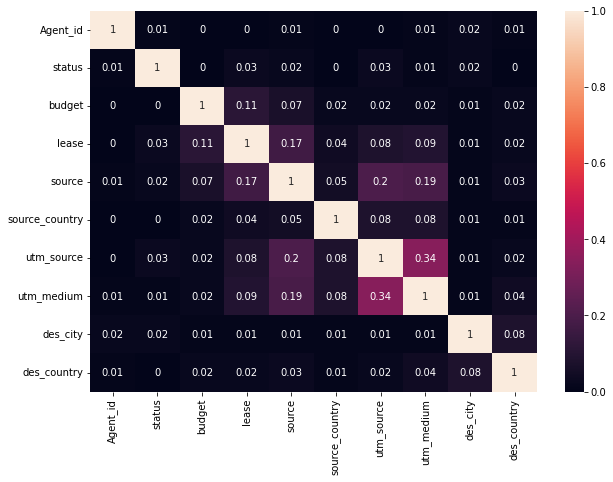

In [80]:
# generating 2-D 10x10 matrix of random numbers
# from 1 to 100
plt.figure(figsize = (10, 7))
data = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))
  
# setting the parameter values
annot = True
  
# plotting the heatmap
hm = sns.heatmap(data=df1,
                annot=annot)
  
# displaying the plotted heatmap
plt.show()

None of the features seems to be much correlated with each other.

# **One hot encoding the categorical features**

In [81]:
#one hot encoding all the categorical variables:
one_hot_encoded_data = pd.get_dummies(new_df, columns = ['Agent_id','budget', 'lease', 'source', 'source_country','utm_source', 'utm_medium', 'des_city', 'des_country'])
one_hot_encoded_data.head(4)

,status,Agent_id_2fca346db656187102ce806ac732e06a62df0dbb2829e511a770556d398e1a6e,Agent_id_44864c96fa1c36602f0d045b268981b6cab638a60fc207c89e3bba235f619450,Agent_id_4596fcf257c4cd0393947526079ade602ea5a8a5774bf4d01f0f8da2d1bfe16a,Agent_id_64ce47d15992e40da1dd9e37330f1aa90bf11b5878258ae20b5ebd5c11aeb3a3,Agent_id_8e2d91da4e36f2d82d3df133ac8f1f274430573c394b0b4a86cf18190e51cd5a,Agent_id_96ab6152cb421b4d4012a4903c19004608a342a5f7c6671a7828b8ad8d5b9489,Agent_id_ab6bb4584e9946b135dca2e39d12abba3ea82d5ea927d05371cc49b0731261ca,Agent_id_eac9815a500f908736d303e23aa227f0957177b0e6756b915a3d3cc3a846b83b,Agent_id_f11a7d64cc0201a4ba1e60e00992d074dc6c46680bb7be196073d26e53e45bf1,...,des_city_9edff2628ff7385bffbe7fc9cae89010d2cb9182e805e146de99e99cd4dfce61,des_city_b2586a6cef5690b74e9fb425f95f8fb3f1e18a4cdc3225eb2f53534ec3602aee,des_city_bf5ade33b5b472c3599473a5cb4e5c7037e4c73296b7e97006edb71f029133b6,des_city_c384826dfbfce62c3fd99a46984a56fe71546a85c2cb6cf12031691b8e038a23,des_city_ecc0e7dc084f141b29479058967d0bc07dee25d9690a98ee4e6fdad5168274d7,des_country_02bf1dfa9a0365a86223f0e4ac9eaa0517b06b2e9273790f719feda656a247ae,des_country_7a1ca4ef7515f7276bae7230545829c27810c9d9e98ab2c06066bee6270d5153,des_country_80db4ccdca106d37b920206331fcfe3e9e50a9e763d89b54ce3ad5ac8cf30f03,des_country_8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512ff098eaa56a4d5fb19,des_country_be55ef3f4c4e6c2d9c2afe2a33ac90ad0f50d4de7f9163999877e2a9ca5a54f8
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## **Variable selection**

In [82]:
new_df.columns

Index(['Agent_id', 'status', 'budget', 'lease', 'source', 'source_country',
       'utm_source', 'utm_medium', 'des_city', 'des_country'],
      dtype='object')

In [83]:
X = one_hot_encoded_data.drop(columns = 'status').values
y = one_hot_encoded_data['status'].values

In [84]:
X

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

## **Handling imbalanced dataset using SMOTE**



In [85]:
new_df['status'].value_counts()

0    28348
1     2034
Name: status, dtype: int64

This is an imbalanced dataset hence, we need to treat the data before using any ML alogrithm, or the algorithm will be biased towards majority class.

In [86]:
#using SMOTE to treat data imbalance
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
X_sm, y_sm = smote.fit_resample(X, y)

print('Original dataset shape', len(new_df))
print('Resampled dataset shape', len(y_sm))

Original dataset shape 30382
Resampled dataset shape 56696


## **Spliting data into training and testing datasets**

In [87]:
X_train, X_test, y_train, y_test= train_test_split(X_sm, y_sm, random_state = 0, test_size = 0.3)

# **Model training using Logistic Regression**

In [88]:
#model training 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### **Model evaluation on Training set**

In [91]:
#predicting and evalating model on training set
y_pred_train = logreg.predict(X_train)
probability_train =logreg.predict_proba(X_train)[:,1]
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.89      0.99      0.94     19848
           1       0.99      0.88      0.93     19839

    accuracy                           0.93     39687
   macro avg       0.94      0.93      0.93     39687
weighted avg       0.94      0.93      0.93     39687



In [92]:
#confusion matrix

cm_logreg1 = confusion_matrix(y_train, y_pred_train, labels = [1,0])
df_logreg1 = pd.DataFrame(data = cm_logreg1 , index = ["Actual 1","Actual 0"], columns = ["Predicted 1", "Predicted 0"])
df_logreg1

,Predicted 1,Predicted 0
Actual 1,17374,2465
Actual 0,167,19681


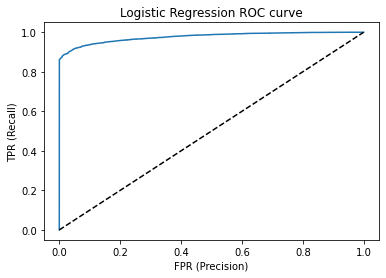

In [93]:
#ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_train, probability_train)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

### **Model evaluation on Test set**

In [94]:
# Predicting for test set

y_pred_log = logreg.predict(X_test)
logreg_probability =logreg.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      8500
           1       0.99      0.87      0.93      8509

    accuracy                           0.93     17009
   macro avg       0.94      0.93      0.93     17009
weighted avg       0.94      0.93      0.93     17009



In [95]:
#confusion matrix

cm_logreg = confusion_matrix(y_test, y_pred_log, labels = [1,0])
df_logreg = pd.DataFrame(data = cm_logreg , index = ["Actual 1","Actual 0"], columns = ["Predicted 1", "Predicted 0"])
df_logreg

,Predicted 1,Predicted 0
Actual 1,7415,1094
Actual 0,75,8425


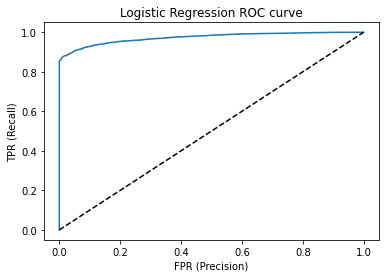

In [96]:
#ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, logreg_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [97]:
logreg_probability

array([1.        , 1.        , 1.        , ..., 0.00281978, 0.01408914,
       1.        ])

In [98]:
# writing model output file

df_prediction_prob = pd.DataFrame(logreg.predict_proba(X_test), columns = ['prob_0', 'prob_1'])
df_test_dataset = pd.DataFrame(y_test,columns=['Actual Status'])
df_x_test = pd.DataFrame(X_test)

dfx=pd.concat([df_test_dataset, df_prediction_prob], axis=1)
dfx.head()


,Actual Status,prob_0,prob_1
0,1,0.000000,1.000000
1,1,0.000000,1.000000
2,1,0.000000,1.000000
3,1,0.000000,1.000000
4,0,0.982868,0.017132


In [99]:
dfx['Lead_score']=dfx['prob_1']*100

In [100]:
dfx.head(5)

,Actual Status,prob_0,prob_1,Lead_score
0,1,0.000000,1.000000,100.000000
1,1,0.000000,1.000000,100.000000
2,1,0.000000,1.000000,100.000000
3,1,0.000000,1.000000,100.000000
4,0,0.982868,0.017132,1.713234


**Based on the positive probability of the lead we will calculate their lead score and the bussiness can approach the potential leads accordingly.**